In [69]:
import numpy as np
import pandas as pd
import re
#import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


In [70]:
X_full = pd.read_excel('/home/ryan/stark/machinehack/Food_QUalityA_ParticipantsData/Food_QUalityA_ParticipantsData/Data_Train.xlsx')


In [71]:
X_full.info()
#cols_with_missing = [col for col in X_full.columns
#                     if X_full[col].isnull().any()]
#cols_with_missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147443 entries, 0 to 147442
Data columns (total 15 columns):
ID                    147443 non-null int64
Date                  147443 non-null object
LicenseNo             147443 non-null int64
FacilityID            147443 non-null int64
FacilityName          147443 non-null int64
Type                  143958 non-null object
Street                147443 non-null int64
City                  147443 non-null object
State                 147443 non-null object
LocationID            147408 non-null float64
Reason                147443 non-null object
SectionViolations     108375 non-null float64
RiskLevel             147443 non-null object
Geo_Loc               147443 non-null object
Inspection_Results    147443 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 16.9+ MB


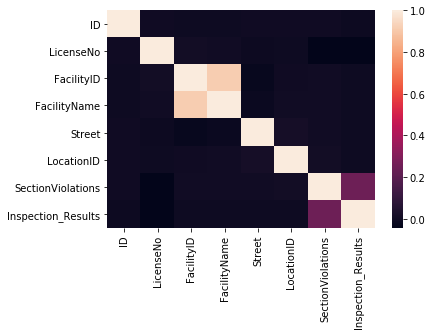

In [72]:
plt.figure()
sns.heatmap(X_full.corr())

In [73]:
X_full.head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4


In [74]:
X_full.describe() #abhi categorial variable ma chudare h 

,ID,LicenseNo,FacilityID,FacilityName,Street,LocationID,SectionViolations,Inspection_Results
count,1.474430e+05,147443.000000,147443.000000,147443.000000,147443.000000,147408.000000,108375.000000,147443.000000
mean,2.997142e+13,17726.613003,14020.779583,13377.891009,8684.119653,81873.642156,24.129153,3.680405
std,1.154808e+13,10865.050018,7794.382869,7408.148606,5255.991577,140.248846,12.657456,1.481441
min,1.000014e+13,0.000000,0.000000,0.000000,0.000000,31259.000000,1.000000,0.000000
25%,1.994861e+13,8588.000000,7347.000000,6993.000000,4109.000000,81859.000000,14.000000,4.000000
50%,2.999146e+13,17056.000000,14256.000000,13710.000000,8541.000000,81870.000000,31.000000,4.000000
75%,3.995723e+13,26163.000000,20841.000000,19795.000000,13321.000000,81888.000000,33.000000,4.000000
max,4.999987e+13,37394.000000,27276.000000,26032.000000,17891.000000,82072.000000,70.000000,6.000000


In [75]:
#ab dataset me khel khelenge

In [76]:
cols_to_drop = [
    'LicenseNo',
    'Date',
    'FacilityID',
    'FacilityName',
    'ID',
    'LocationID'
    
    ]

df = X_full.drop(cols_to_drop, axis=1)
df.head()

,Type,Street,City,State,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,RESTAURANT,15522,id-11235901,id_1890134,CANVASS,33.0,High,locid16406,4
1,GROCERY STORE,3057,id-11235901,id_1890134,COMPLAINT,33.0,High,locid878,4
2,RESTAURANT,14988,id-11235901,id_1890134,CANVASS,NaN,High,locid3368,6
3,RESTAURANT,3661,id-11235901,id_1890134,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,RESTAURANT,7876,id-11235901,id_1890134,COMPLAINT,30.0,High,locid12264,4


In [77]:
Y = df['Inspection_Results'] 

In [78]:
Y = pd.get_dummies(Y, prefix="Ins",columns=['Inspection_Results'])

In [79]:
Y.head()

,Ins_0,Ins_1,Ins_2,Ins_3,Ins_4,Ins_5,Ins_6
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


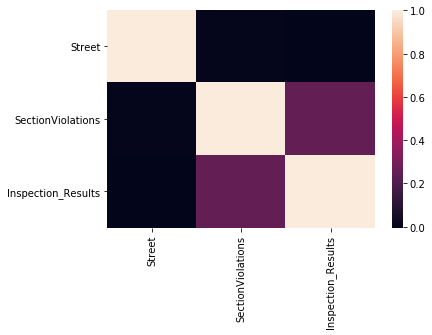

In [80]:
plt.figure()
sns.heatmap(df.corr())

In [81]:
df['SectionViolations'].fillna(method='ffill', inplace=True)

In [82]:
df['SectionViolations'].isnull().any()


False

In [83]:
print(df['State'].unique())
print(df['City'].unique())
#df['SectionViolations'].unique()


[u'id_1890134' u'id_1890135']
[u'id-11235901' u'id-11275913']


In [84]:
statedict = { 'id_1890134':1,
              'id_1890135':2
             }
df['State'] = df.State.map(statedict)

citydict = {'id-11235901':1,
            'id-11275913' :2
           }

df['City'] = df.City.map(citydict)


In [85]:
"""riskdict={'High':1,
          'Medium':2,
          'Low' : 3,
          'Uncertain':4
         }
df['RiskLevelOrdinal']= df.RiskLevel.map(riskdict)
"""

"riskdict={'High':1,\n          'Medium':2,\n          'Low' : 3,\n          'Uncertain':4\n         }\ndf['RiskLevelOrdinal']= df.RiskLevel.map(riskdict)\n"

In [86]:
df = pd.get_dummies(df, prefix="Risk",columns=['RiskLevel'])

In [87]:
df = pd.get_dummies(df, prefix="Reason",columns=['Reason'])

In [88]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Type']= label_encoder.fit_transform(df['Type']) 
df['Geo_Loc'] = label_encoder.fit_transform(df['Geo_Loc'])  
df['Type'].unique() 

array([3811, 3667, 3560, ..., 3145, 3051, 3020])

In [89]:
df.head()

,Type,Street,City,State,SectionViolations,Geo_Loc,Inspection_Results,Risk_High,Risk_Low,Risk_Medium,...,Reason_LICENSE RE-INSPECTION,Reason_LICENSE-TASK FORCE,Reason_OUT OF BUSINESS,Reason_RECENT INSPECTION,Reason_SHORT FORM COMPLAINT,Reason_SHORT FORM FIRE-COMPLAINT,Reason_SUSPECTED FOOD POISONING,Reason_SUSPECTED FOOD POISONING RE-INSPECTION,Reason_TAG REMOVAL,Reason_TASK FORCE LIQUOR 1475
0,3811,15522,1,1,33.0,6889,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3667,3057,1,1,33.0,14998,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3811,14988,1,1,33.0,9140,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3811,3661,1,1,31.0,1991,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3811,7876,1,1,30.0,2443,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
cols_to_drop = [
    'Inspection_Results'
    ]

X = df.drop(cols_to_drop, axis=1)


In [91]:
X.isnull().any()

Type                                             False
Street                                           False
City                                             False
State                                            False
SectionViolations                                False
Geo_Loc                                          False
Risk_High                                        False
Risk_Low                                         False
Risk_Medium                                      False
Risk_Uncertain                                   False
Reason_CANVASS                                   False
Reason_CANVASS RE-INSPECTION                     False
Reason_COMPLAINT                                 False
Reason_COMPLAINT RE-INSPECTION                   False
Reason_COMPLAINT-FIRE                            False
Reason_CONSULTATION                              False
Reason_LICENSE                                   False
Reason_LICENSE RE-INSPECTION                     False
Reason_LIC

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB


In [95]:
from xgboost import XGBClassifier

In [96]:
my_model = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, Y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, Y_test)], 
             verbose=False)

ValueError: bad input shape (117954, 7)

In [68]:
my_model.score(X_test,Y_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7337990437112144

In [31]:
#x_test.count()

In [32]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rf.score(X_test,Y_test)

0.7115873715622775

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=4)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.bestparams

In [ ]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

In [34]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [35]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)


In [60]:
random_forest.score(X_test, Y_test)


0.7216928346162976

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [100]:
#KNN 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [99]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

ValueError: bad input shape (117954, 7)

In [39]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [40]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [97]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [98]:
decision_tree.score(X_test,Y_test)

0.6604157482451083

In [42]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
96.94,Decision Tree
96.93,Random Forest
76.24,KNN
66.73,Logistic Regression
51.62,Stochastic Gradient Decent
46.03,Support Vector Machines
44.36,Naive Bayes
31.34,Perceptron


In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

In [ ]:
'''from sklearn.ensemble import RandomForestRegressor
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5] '''

In [ ]:
'''from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=x_train, X_v=x_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))
    '''

In [ ]:
'''my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
             '''

In [ ]:
'''from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(knn, 'filename.pkl') 
  
# Load the model from the file 
knn_from_joblib = joblib.load('filename.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(X_test) '''

In [43]:
tm = pd.read_excel('/home/ryan/stark/machinehack/Food_QUalityA_ParticipantsData/Food_QUalityA_ParticipantsData/Data_Test.xlsx')


In [44]:
tm.count()

ID                   49148
Date                 49148
LicenseNo            49148
FacilityID           49148
FacilityName         49148
Type                 47933
Street               49148
City                 49148
State                49148
LocationID           49133
Reason               49148
SectionViolations    36172
RiskLevel            49148
Geo_Loc              49148
dtype: int64

In [45]:
cols_to_drop = [
    'LicenseNo',
    'Date',
    'FacilityID',
    'FacilityName',
    'ID',
    'LocationID'
    
    ]

tf = tm.drop(cols_to_drop, axis=1)
tf.head()

,Type,Street,City,State,Reason,SectionViolations,RiskLevel,Geo_Loc
0,GROCERY STORE,17352,id-11235901,id_1890134,CANVASS,19.0,Low,locid1145
1,SCHOOL,15536,id-11235901,id_1890134,CANVASS,32.0,High,locid16450
2,RESTAURANT,8849,id-11235901,id_1890134,CANVASS,NaN,High,locid12916
3,SCHOOL,11663,id-11235901,id_1890134,CANVASS,NaN,High,locid7292
4,RESTAURANT,16286,id-11235901,id_1890134,CANVASS RE-INSPECTION,32.0,High,locid2048


In [46]:
tf['SectionViolations'].fillna(method='pad', inplace=True)

In [47]:
tf['City'].unique()

array([u'id-11235901', u'id-11275913'], dtype=object)

In [48]:
statedict = { 'id_1890134':1,
              'id_1890135':2
             }
tf['State'] = tf.State.map(statedict)


In [49]:

citydict = {'id-11235901':1,
            'id-11275913' :2
           }

tf['City'] = tf.City.map(citydict)


In [50]:
tf = pd.get_dummies(tf, prefix="Risk",columns=['RiskLevel'])
tf = pd.get_dummies(tf, prefix="Reason",columns=['Reason'])

In [51]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
tf['Type']= label_encoder.fit_transform(tf['Type']) 
tf['Geo_Loc'] = label_encoder.fit_transform(tf['Geo_Loc'])  
tf['Type'].unique() 

array([1342, 1471, 1449, ..., 1206, 1189, 1177])

In [52]:
tf.head()

,Type,Street,City,State,SectionViolations,Geo_Loc,Risk_High,Risk_Low,Risk_Medium,Risk_Uncertain,...,Reason_LICENSE RE-INSPECTION,Reason_LICENSE-TASK FORCE,Reason_OUT OF BUSINESS,Reason_RECENT INSPECTION,Reason_SHORT FORM COMPLAINT,Reason_SHORT FORM FIRE-COMPLAINT,Reason_SUSPECTED FOOD POISONING,Reason_SUSPECTED FOOD POISONING RE-INSPECTION,Reason_TAG REMOVAL,Reason_TASK FORCE LIQUOR 1475
0,1342,17352,1,1,19.0,1341,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1471,15536,1,1,32.0,5812,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1449,8849,1,1,32.0,2658,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1471,11663,1,1,32.0,11144,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1449,16286,1,1,32.0,6425,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
f=rf.predict(tf)

In [54]:
s = pd.read_excel('/home/ryan/stark/machinehack/Food_QUalityA_ParticipantsData/Food_QUalityA_ParticipantsData/Sample_Submission.xlsx')


In [55]:
s.head()

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [56]:
zf = pd.DataFrame(f.tolist()) 

In [59]:
zf

,0
0,6
1,6
2,1
3,6
4,4
5,6
6,6
7,1
8,4
9,1


,Ins_6,Ins_6,Ins_1,Ins_6,Ins_4,Ins_6,Ins_6,Ins_1,Ins_4,Ins_1
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
zf.head()

,0
0,6
1,6
2,6
3,6
4,4


In [150]:
zf.rename(columns = {0:'FACILITY CHANGED',1:'FAIL',2:'FURTHER INSPECTION REQUIRED',3:'INSPECTION OVERRULED',4:'PASS',5:'PASS(CONDITIONAL)',6:'SHUT-DOWN'},inplace=True)


In [152]:
zf.head()

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [159]:
zf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49148 entries, 0 to 49147
Data columns (total 7 columns):
FACILITY CHANGED               49148 non-null float64
FAIL                           49148 non-null float64
FURTHER INSPECTION REQUIRED    49148 non-null float64
INSPECTION OVERRULED           49148 non-null float64
PASS                           49148 non-null float64
PASS(CONDITIONAL)              49148 non-null float64
SHUT-DOWN                      49148 non-null float64
dtypes: float64(7)
memory usage: 2.6 MB


In [154]:
zf.to_excel(excel_writer = "/home/ryan/stark/machinehack/Food_QUalityA_ParticipantsData/Food_QUalityA_ParticipantsData/submission1.xlsx")

In [155]:
p = pd.read_excel("/home/ryan/stark/machinehack/Food_QUalityA_ParticipantsData/Food_QUalityA_ParticipantsData/submission1.xlsx")

In [158]:
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49148 entries, 0 to 49147
Data columns (total 7 columns):
FACILITY CHANGED               49148 non-null int64
FAIL                           49148 non-null int64
FURTHER INSPECTION REQUIRED    49148 non-null int64
INSPECTION OVERRULED           49148 non-null int64
PASS                           49148 non-null int64
PASS(CONDITIONAL)              49148 non-null int64
SHUT-DOWN                      49148 non-null int64
dtypes: int64(7)
memory usage: 3.0 MB


In [157]:
s.head()

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,0.1,0.1,0.1,0.1,0.1,0.1,0.1
